In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

CHANGING VAL DATA TO TEST DATA

In [2]:
# Define directories for the data
train_dir = r'C:\Users\Sailesh\Files\Coding\Python\Projects\ChestXRay\Dataset\train'
test_dir = r'C:\Users\Sailesh\Files\Coding\Python\Projects\ChestXRay\Dataset\test'
val_dir = r'C:\Users\Sailesh\Files\Coding\Python\Projects\ChestXRay\Dataset\test'

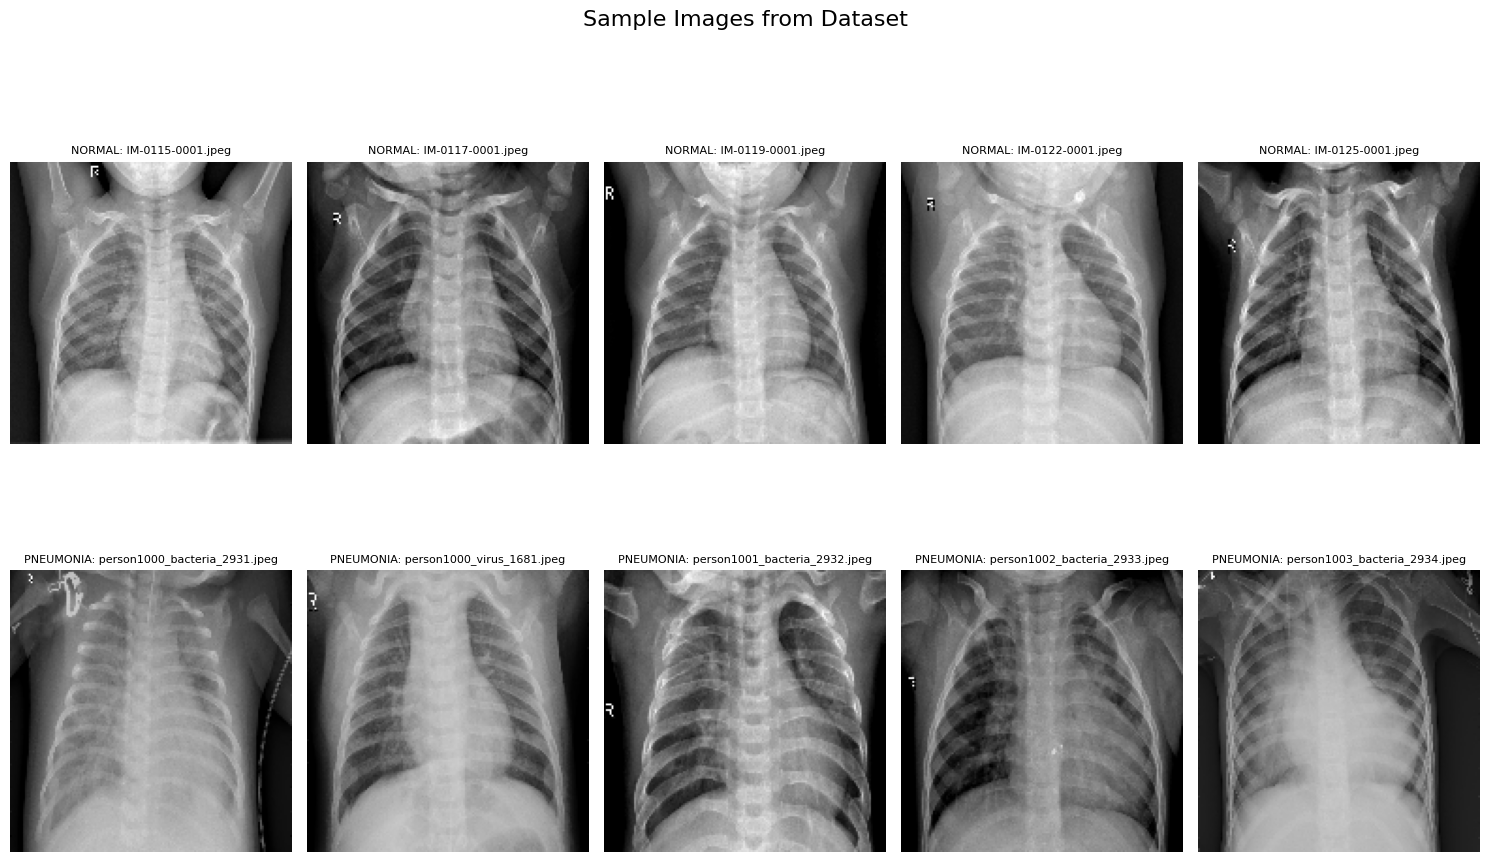


Image Names and Classes:
Class: NORMAL, File Name: IM-0115-0001.jpeg
Class: NORMAL, File Name: IM-0117-0001.jpeg
Class: NORMAL, File Name: IM-0119-0001.jpeg
Class: NORMAL, File Name: IM-0122-0001.jpeg
Class: NORMAL, File Name: IM-0125-0001.jpeg
Class: PNEUMONIA, File Name: person1000_bacteria_2931.jpeg
Class: PNEUMONIA, File Name: person1000_virus_1681.jpeg
Class: PNEUMONIA, File Name: person1001_bacteria_2932.jpeg
Class: PNEUMONIA, File Name: person1002_bacteria_2933.jpeg
Class: PNEUMONIA, File Name: person1003_bacteria_2934.jpeg

Number of Images per Class:
Class: NORMAL, Count: 1341
Class: PNEUMONIA, Count: 3875


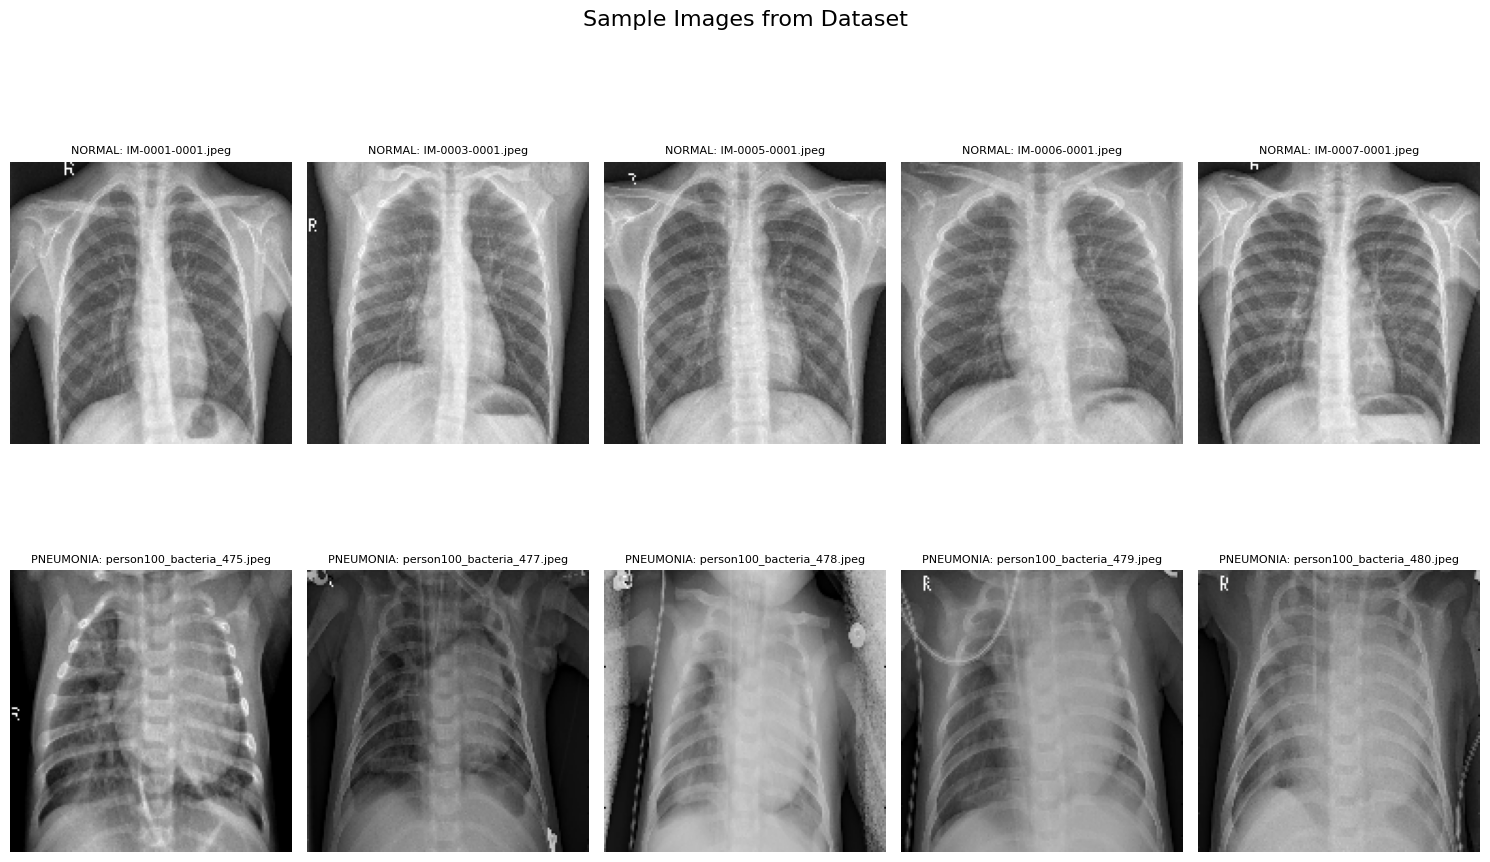


Image Names and Classes:
Class: NORMAL, File Name: IM-0001-0001.jpeg
Class: NORMAL, File Name: IM-0003-0001.jpeg
Class: NORMAL, File Name: IM-0005-0001.jpeg
Class: NORMAL, File Name: IM-0006-0001.jpeg
Class: NORMAL, File Name: IM-0007-0001.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_475.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_477.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_478.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_479.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_480.jpeg

Number of Images per Class:
Class: NORMAL, Count: 234
Class: PNEUMONIA, Count: 390


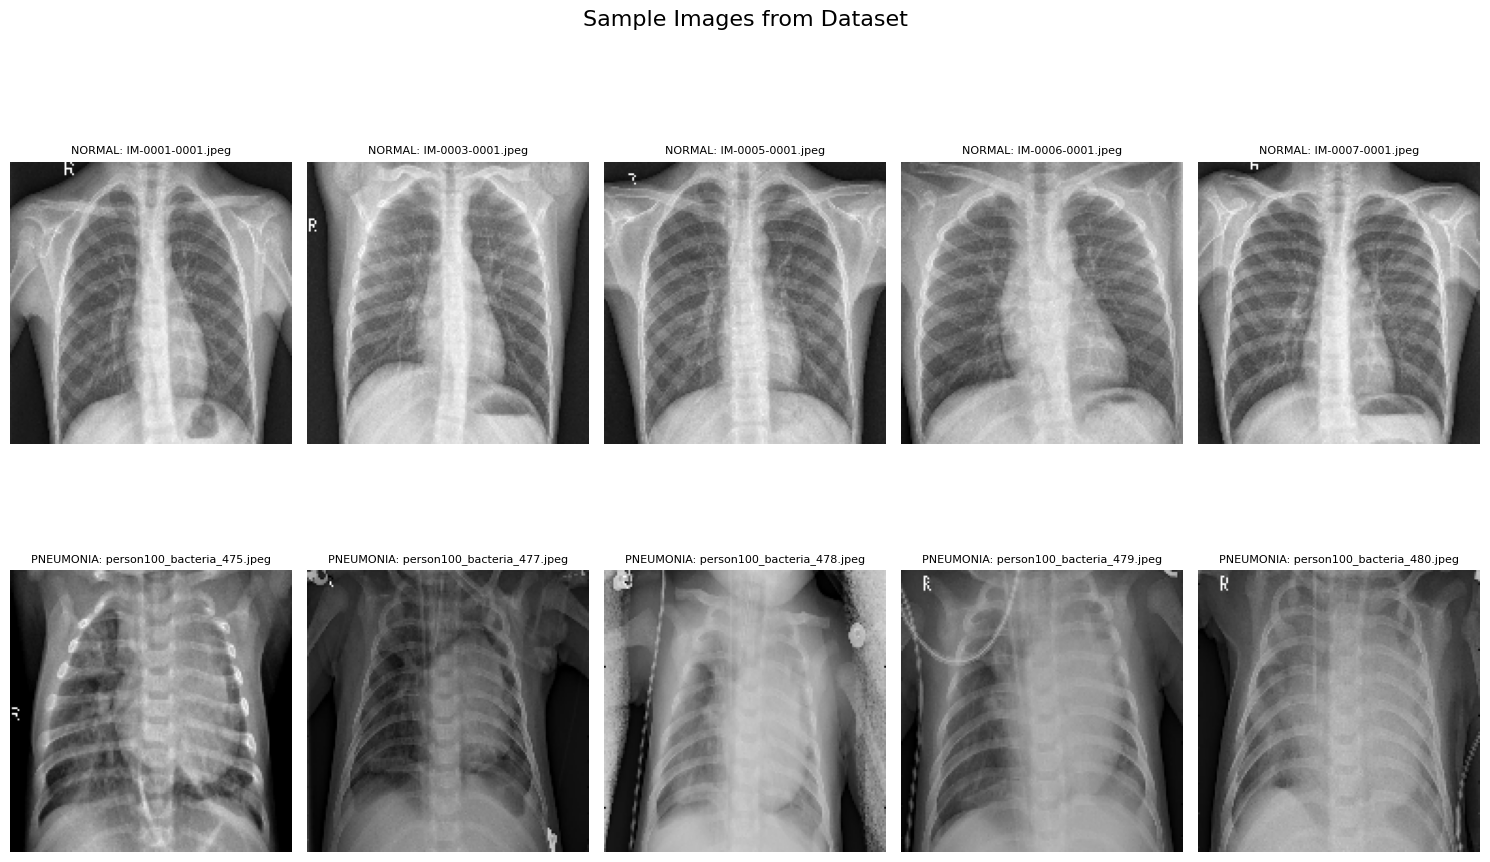


Image Names and Classes:
Class: NORMAL, File Name: IM-0001-0001.jpeg
Class: NORMAL, File Name: IM-0003-0001.jpeg
Class: NORMAL, File Name: IM-0005-0001.jpeg
Class: NORMAL, File Name: IM-0006-0001.jpeg
Class: NORMAL, File Name: IM-0007-0001.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_475.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_477.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_478.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_479.jpeg
Class: PNEUMONIA, File Name: person100_bacteria_480.jpeg

Number of Images per Class:
Class: NORMAL, Count: 234
Class: PNEUMONIA, Count: 390


In [3]:
# Function to display images with file names and class counts
def display_images_with_filenames(directory, num_images=10):
    images = []
    labels = []
    file_names = []
    class_counts = {}
    
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
            
            # Limit images per class and avoid division errors
            images_per_class = max(1, num_images // len(os.listdir(directory)))
            for img_file in os.listdir(class_dir)[:images_per_class]:
                img_path = os.path.join(class_dir, img_file)
                images.append(img_path)
                labels.append(class_name)
                file_names.append(img_file)
    
    # Display images
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(images[:num_images]):
        img = load_img(img_path, target_size=(150, 150))
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(f"{labels[i]}: {file_names[i]}", fontsize=8)
        plt.axis('off')
    
    plt.suptitle("Sample Images from Dataset", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Print filenames and their classes
    print("\nImage Names and Classes:")
    for i in range(min(num_images, len(images))):
        print(f"Class: {labels[i]}, File Name: {file_names[i]}")

    # Print number of images per class
    print("\nNumber of Images per Class:")
    for class_name, count in class_counts.items():
        print(f"Class: {class_name}, Count: {count}")

# Display images
display_images_with_filenames(train_dir, num_images=10)
display_images_with_filenames(test_dir, num_images=10)
display_images_with_filenames(val_dir, num_images=10)

In [4]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False  # Important for metrics calculation
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW



# Build the CNN model

def create_improved_model(input_shape=(150, 150, 3)):
    model = Sequential()

    # Input Layer
    model.add(Input(shape=input_shape))

    # Convolutional Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))  # Dropout added here

    # Convolutional Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Dropout added here

    # Convolutional Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Dropout added here

    # Convolutional Block 4
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))  # Dropout added here

    # Global Average Pooling instead of Flatten
    model.add(GlobalAveragePooling2D())

    # Fully Connected Layers
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))  # Dropout for fully connected layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))  # Dropout for fully connected layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)
    model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    # Compile the model

    return model


# Create the improved model
model = create_improved_model()

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │              

 Total params: 431,553 (1.65 MB)

 Trainable params: 430,593 (1.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [6]:


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callback 1: Save model weights at every epoch
checkpoint_callback = ModelCheckpoint(
    filepath='weights_epoch_{epoch:02d}.weights.h5',  # Filepath with epoch number
    save_weights_only=True,                          # Save only weights, not the full model
    save_freq='epoch',                               # Save after every epoch
    verbose=1                                        # Print a message after saving
)

# Callback 3: Reduce learning rate when a plateau in validation loss is observed
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',              # Monitor validation loss
    factor=0.5,                      # Reduce learning rate by 50%
    patience=3,                      # Wait for 3 epochs before reducing LR
    min_lr=1e-6,                     # Minimum learning rate
    verbose=1
)

# Compile the model (recompile to ensure all changes are applied)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model



In [7]:
history = model.fit(
    train_generator,                # Training data generator
    epochs=40,                      # Number of epochs
    validation_data=val_generator,  # Validation data generator
    callbacks=[checkpoint_callback, lr_scheduler]  # Add callbacks
)

Epoch 1/40


C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7721 - loss: 0.9829
Epoch 1: saving model to weights_epoch_01.weights.h5
261/261 ━━━━━━━━━━━━━━━━━━━━ 103s 378ms/step - accuracy: 0.7723 - loss: 0.9824 - val_accuracy: 0.6250 - val_loss: 7.7679 - learning_rate: 0.0010
Epoch 2/40
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8685 - loss: 0.6675
Epoch 2: saving model to weights_epoch_02.weights.h5
261/261 ━━━━━━━━━━━━━━━━━━━━ 99s 374ms/step - accuracy: 0.8685 - loss: 0.6674 - val_accuracy: 0.6250 - val_loss: 1.7523 - learning_rate: 0.0010
Epoch 3/40
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.8608 - loss: 0.5759
Epoch 3: saving model to weights_epoch_03.weights.h5
261/261 ━━━━━━━━━━━━━━━━━━━━ 103s 390ms/step - accuracy: 0.8608 - loss: 0.5758 - val_accuracy: 0.3942 - val_loss: 1.0816 - learning_rate: 0.0010
Epoch 4/40
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.8779 - loss: 0.4794
Epoch 4: saving model to weights_epoch_04.weights.h5
261/261 ━━━━━

In [11]:
# Continue training for 10 additional epochs
history_more = model.fit(
    train_generator,                 # Training data generator
    epochs=50,                       # Total epochs (40 completed + 10 more = 50)
    initial_epoch=40,                # Start from epoch 40
    validation_data=val_generator,   # Validation data generator
    callbacks=[checkpoint_callback, lr_scheduler]  # Same callbacks as before
)

Epoch 41/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.9541 - loss: 0.1915
Epoch 41: saving model to weights_epoch_41.weights.h5
261/261 ━━━━━━━━━━━━━━━━━━━━ 109s 414ms/step - accuracy: 0.9541 - loss: 0.1915 - val_accuracy: 0.9151 - val_loss: 0.3142 - learning_rate: 7.8125e-06
Epoch 42/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.9533 - loss: 0.1845
Epoch 42: saving model to weights_epoch_42.weights.h5
261/261 ━━━━━━━━━━━━━━━━━━━━ 115s 435ms/step - accuracy: 0.9533 - loss: 0.1845 - val_accuracy: 0.9119 - val_loss: 0.2983 - learning_rate: 7.8125e-06
Epoch 43/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9457 - loss: 0.1993
Epoch 43: saving model to weights_epoch_43.weights.h5
261/261 ━━━━━━━━━━━━━━━━━━━━ 111s 418ms/step - accuracy: 0.9457 - loss: 0.1993 - val_accuracy: 0.9022 - val_loss: 0.2995 - learning_rate: 7.8125e-06
Epoch 44/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.9533 - loss: 0.1815
Epoch 44: saving model to weights_e


Evaluating Model for Epoch 1:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


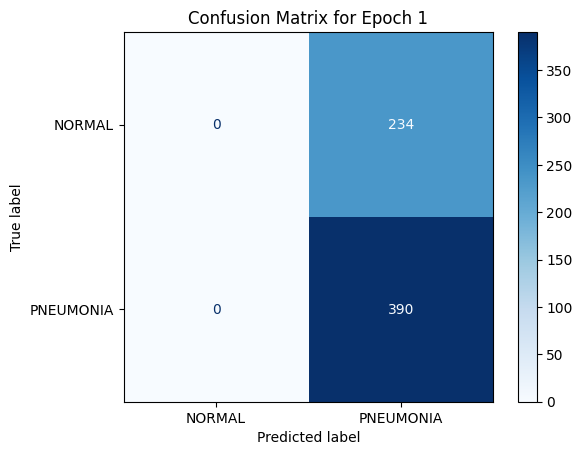

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624


Evaluating Model for Epoch 2:


C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step


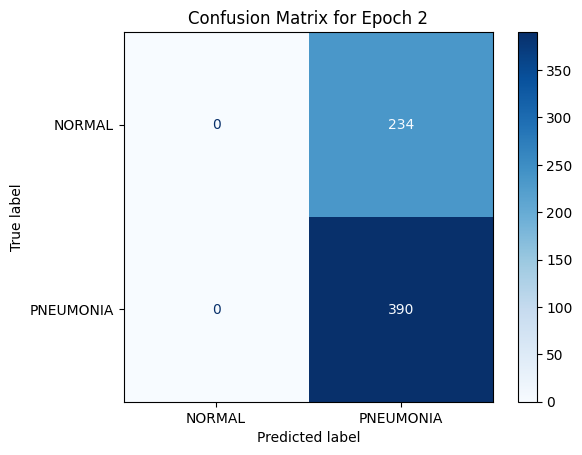

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624


Evaluating Model for Epoch 3:


C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


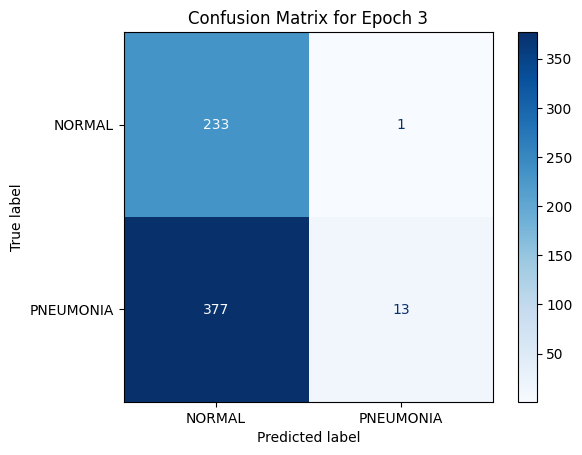

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.93      0.03      0.06       390

    accuracy                           0.39       624
   macro avg       0.66      0.51      0.31       624
weighted avg       0.72      0.39      0.25       624


Evaluating Model for Epoch 4:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step


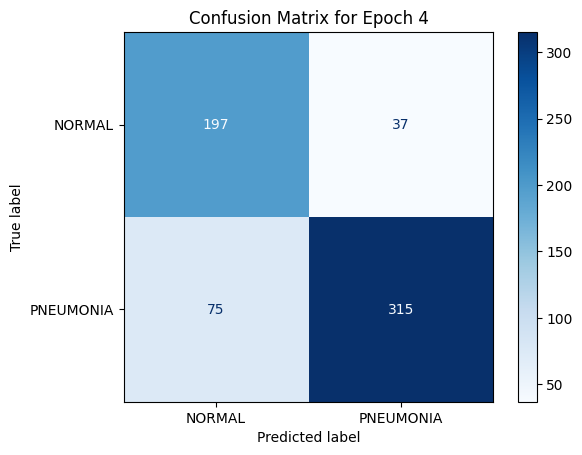

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.72      0.84      0.78       234
   PNEUMONIA       0.89      0.81      0.85       390

    accuracy                           0.82       624
   macro avg       0.81      0.82      0.81       624
weighted avg       0.83      0.82      0.82       624


Evaluating Model for Epoch 5:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step


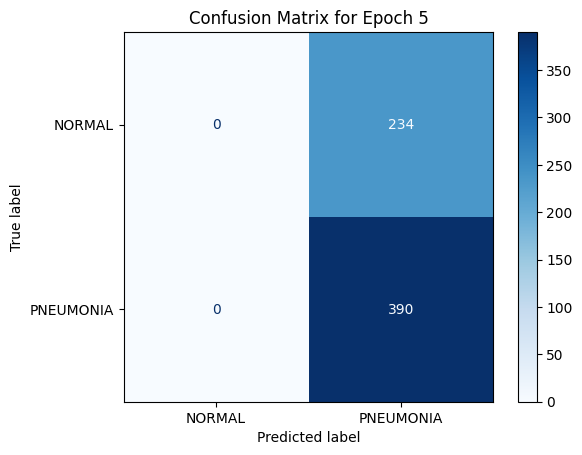

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624


Evaluating Model for Epoch 6:


C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step


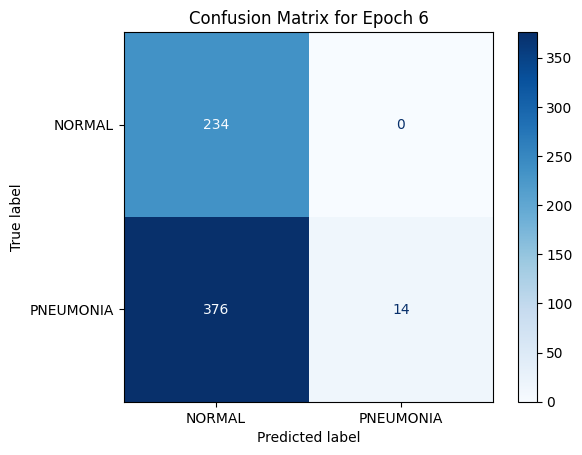

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       1.00      0.04      0.07       390

    accuracy                           0.40       624
   macro avg       0.69      0.52      0.31       624
weighted avg       0.77      0.40      0.25       624


Evaluating Model for Epoch 7:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step


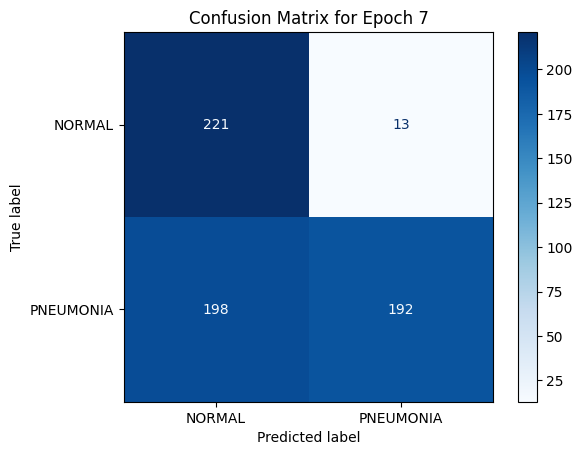

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.53      0.94      0.68       234
   PNEUMONIA       0.94      0.49      0.65       390

    accuracy                           0.66       624
   macro avg       0.73      0.72      0.66       624
weighted avg       0.78      0.66      0.66       624


Evaluating Model for Epoch 8:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


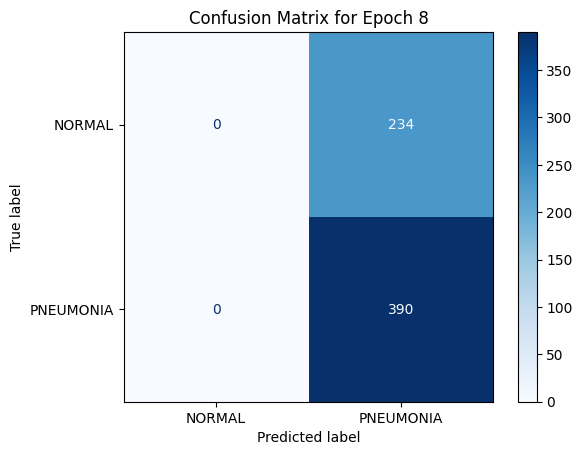

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624


Evaluating Model for Epoch 9:


C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step


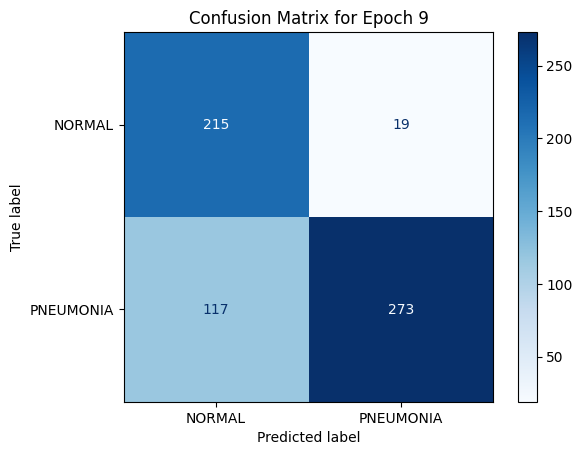

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.65      0.92      0.76       234
   PNEUMONIA       0.93      0.70      0.80       390

    accuracy                           0.78       624
   macro avg       0.79      0.81      0.78       624
weighted avg       0.83      0.78      0.79       624


Evaluating Model for Epoch 10:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step


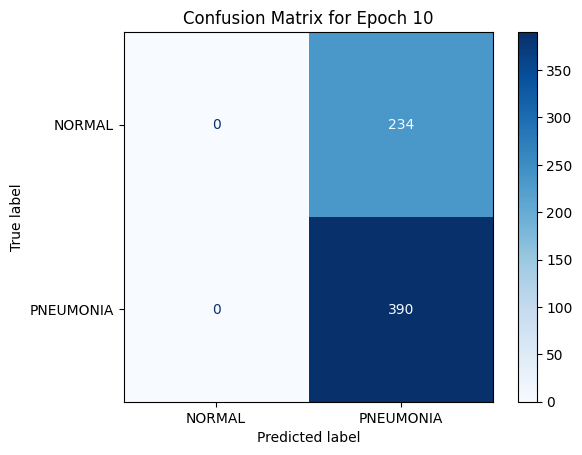

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624


Evaluating Model for Epoch 11:


C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step


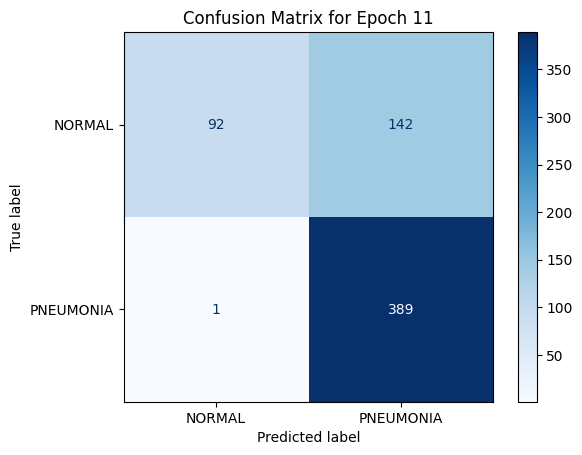

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.99      0.39      0.56       234
   PNEUMONIA       0.73      1.00      0.84       390

    accuracy                           0.77       624
   macro avg       0.86      0.70      0.70       624
weighted avg       0.83      0.77      0.74       624


Evaluating Model for Epoch 12:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step


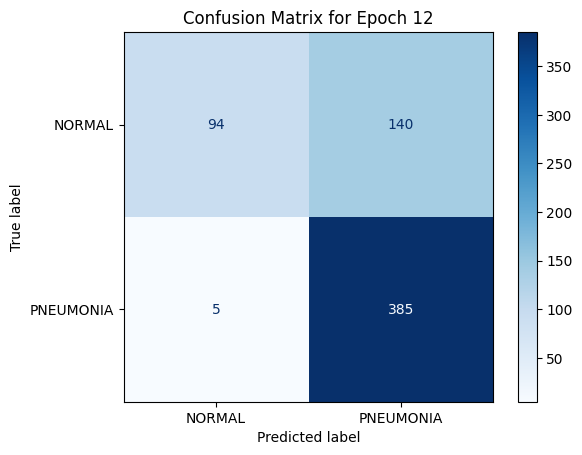

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.95      0.40      0.56       234
   PNEUMONIA       0.73      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.69      0.70       624
weighted avg       0.81      0.77      0.74       624


Evaluating Model for Epoch 13:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step


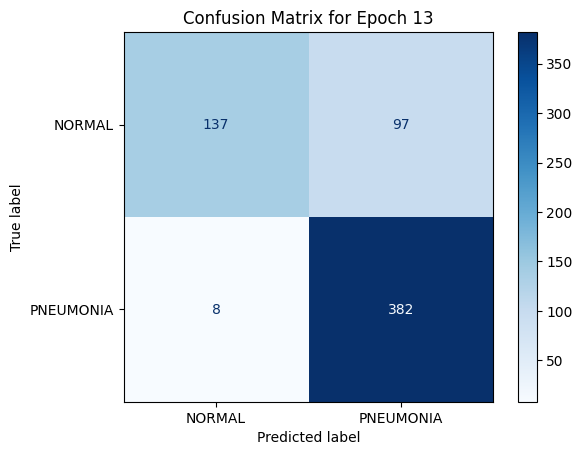

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.94      0.59      0.72       234
   PNEUMONIA       0.80      0.98      0.88       390

    accuracy                           0.83       624
   macro avg       0.87      0.78      0.80       624
weighted avg       0.85      0.83      0.82       624


Evaluating Model for Epoch 14:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step


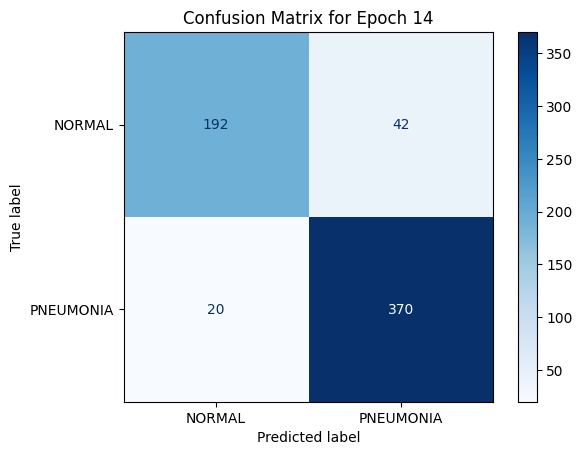

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.82      0.86       234
   PNEUMONIA       0.90      0.95      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624


Evaluating Model for Epoch 15:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


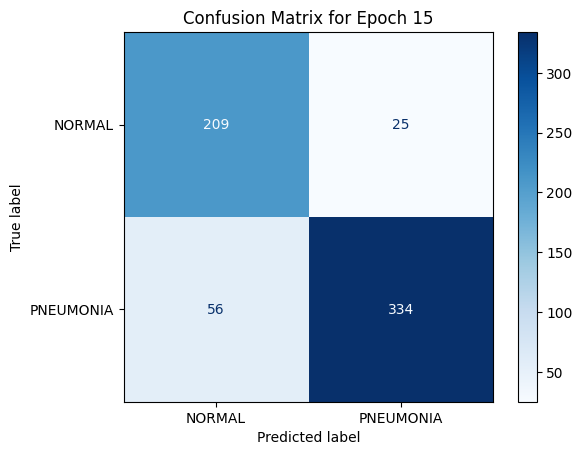

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.79      0.89      0.84       234
   PNEUMONIA       0.93      0.86      0.89       390

    accuracy                           0.87       624
   macro avg       0.86      0.87      0.86       624
weighted avg       0.88      0.87      0.87       624


Evaluating Model for Epoch 16:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step


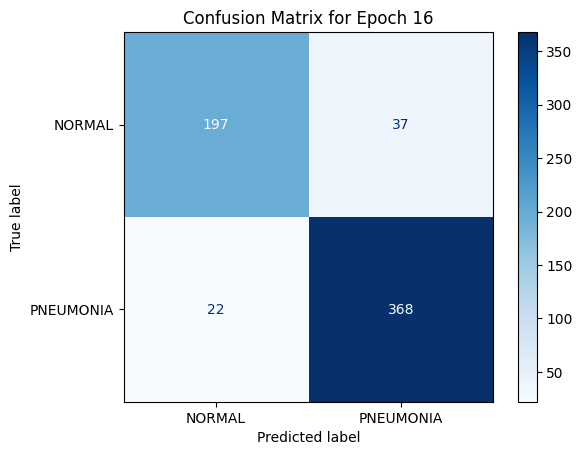

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.90      0.84      0.87       234
   PNEUMONIA       0.91      0.94      0.93       390

    accuracy                           0.91       624
   macro avg       0.90      0.89      0.90       624
weighted avg       0.91      0.91      0.90       624


Evaluating Model for Epoch 17:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


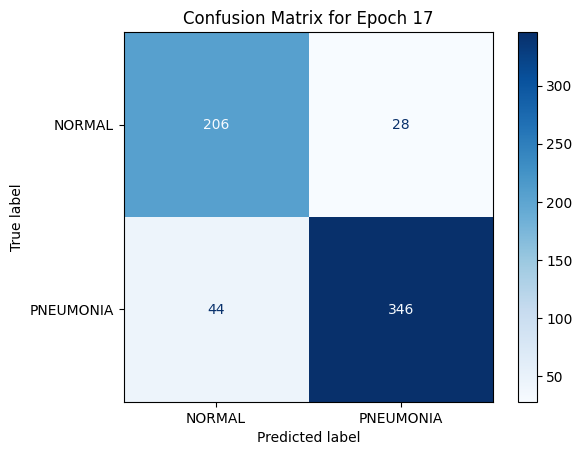

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.82      0.88      0.85       234
   PNEUMONIA       0.93      0.89      0.91       390

    accuracy                           0.88       624
   macro avg       0.87      0.88      0.88       624
weighted avg       0.89      0.88      0.89       624


Evaluating Model for Epoch 18:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


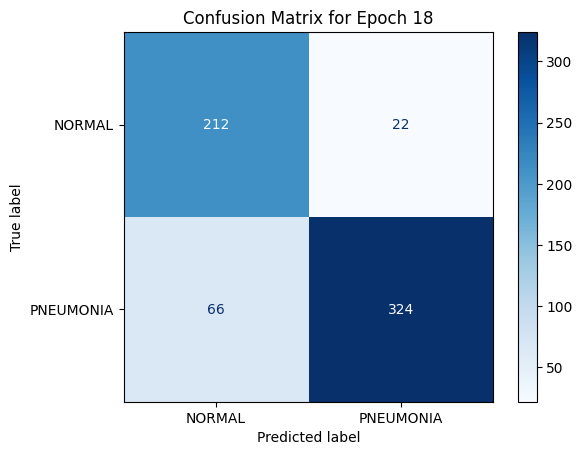

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.76      0.91      0.83       234
   PNEUMONIA       0.94      0.83      0.88       390

    accuracy                           0.86       624
   macro avg       0.85      0.87      0.85       624
weighted avg       0.87      0.86      0.86       624


Evaluating Model for Epoch 19:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


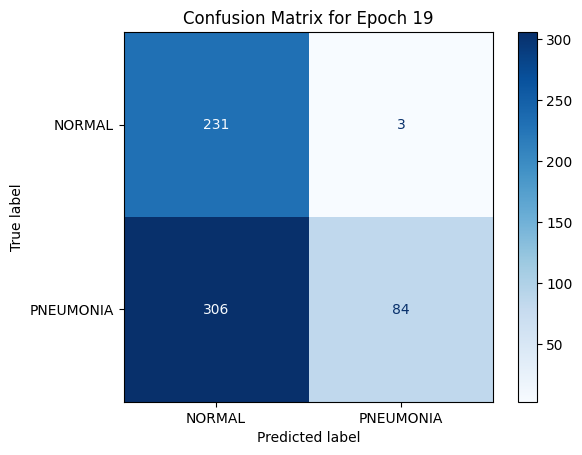

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.43      0.99      0.60       234
   PNEUMONIA       0.97      0.22      0.35       390

    accuracy                           0.50       624
   macro avg       0.70      0.60      0.48       624
weighted avg       0.76      0.50      0.44       624


Evaluating Model for Epoch 20:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step


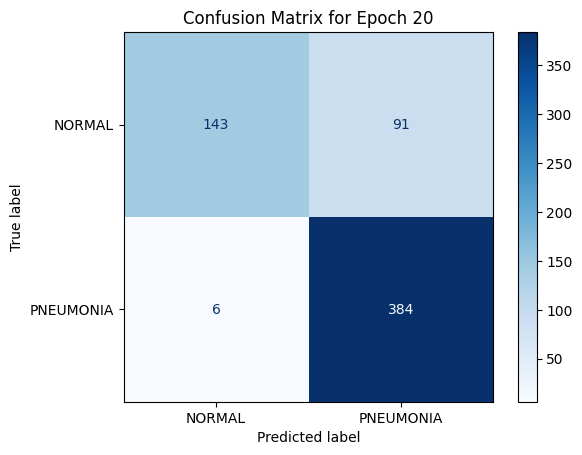

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.61      0.75       234
   PNEUMONIA       0.81      0.98      0.89       390

    accuracy                           0.84       624
   macro avg       0.88      0.80      0.82       624
weighted avg       0.87      0.84      0.83       624


Evaluating Model for Epoch 21:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step


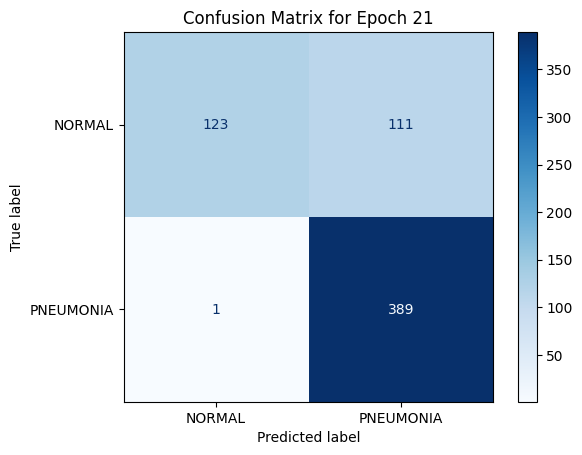

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.99      0.53      0.69       234
   PNEUMONIA       0.78      1.00      0.87       390

    accuracy                           0.82       624
   macro avg       0.88      0.76      0.78       624
weighted avg       0.86      0.82      0.80       624


Evaluating Model for Epoch 22:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step


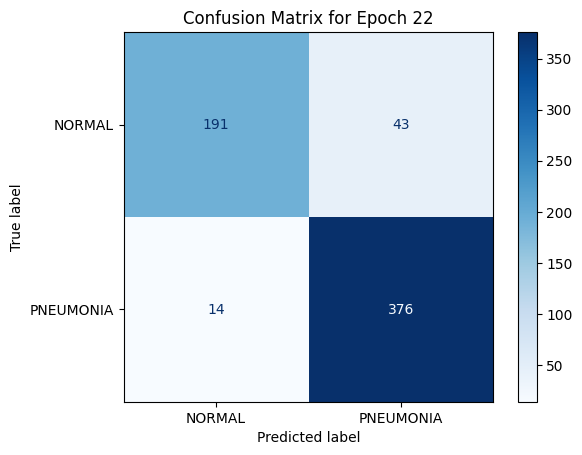

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.93      0.82      0.87       234
   PNEUMONIA       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624


Evaluating Model for Epoch 23:
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step


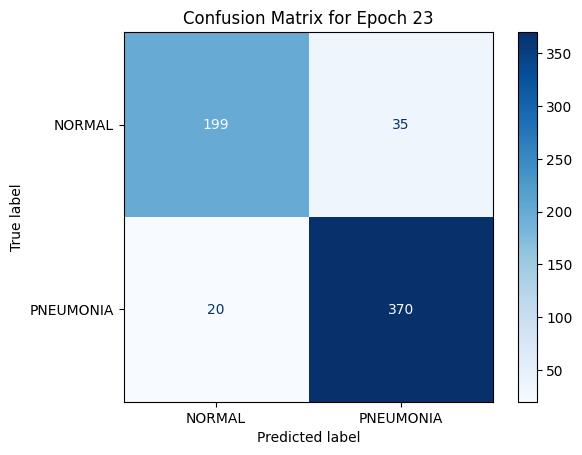

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.85      0.88       234
   PNEUMONIA       0.91      0.95      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624


Evaluating Model for Epoch 24:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step


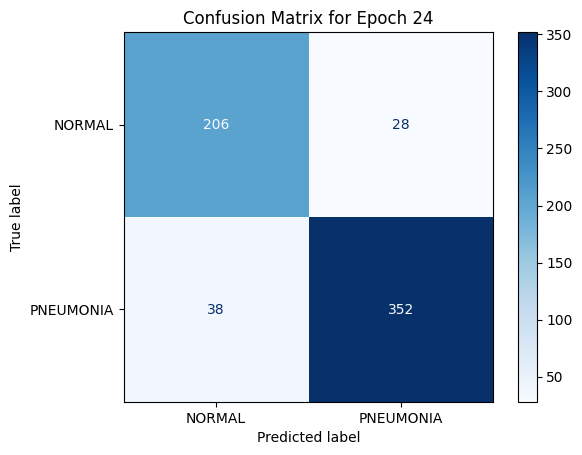

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.84      0.88      0.86       234
   PNEUMONIA       0.93      0.90      0.91       390

    accuracy                           0.89       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.89      0.89       624


Evaluating Model for Epoch 25:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


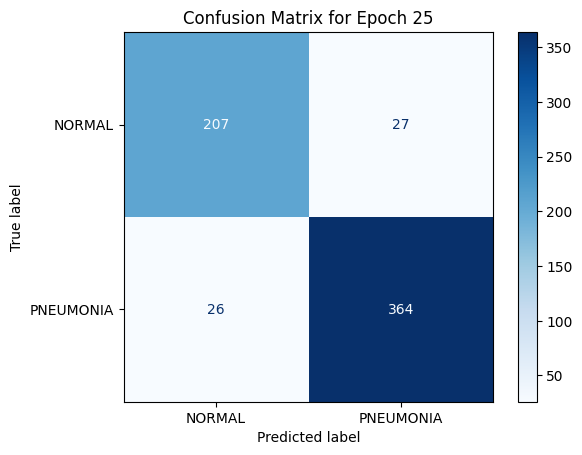

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.89      0.88      0.89       234
   PNEUMONIA       0.93      0.93      0.93       390

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.91      0.92      0.92       624


Evaluating Model for Epoch 26:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step


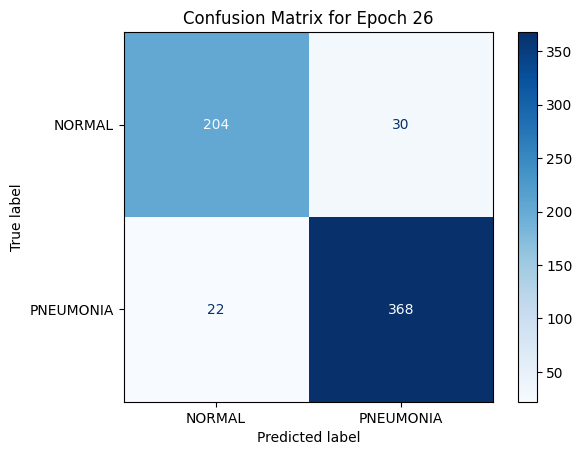

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.90      0.87      0.89       234
   PNEUMONIA       0.92      0.94      0.93       390

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 27:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


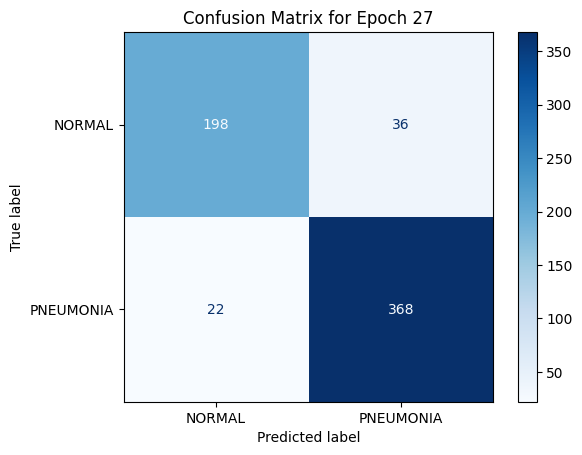

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.90      0.85      0.87       234
   PNEUMONIA       0.91      0.94      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624


Evaluating Model for Epoch 28:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step


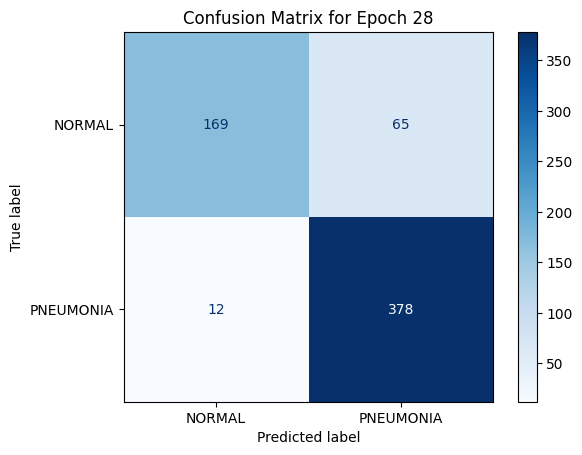

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.93      0.72      0.81       234
   PNEUMONIA       0.85      0.97      0.91       390

    accuracy                           0.88       624
   macro avg       0.89      0.85      0.86       624
weighted avg       0.88      0.88      0.87       624


Evaluating Model for Epoch 29:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


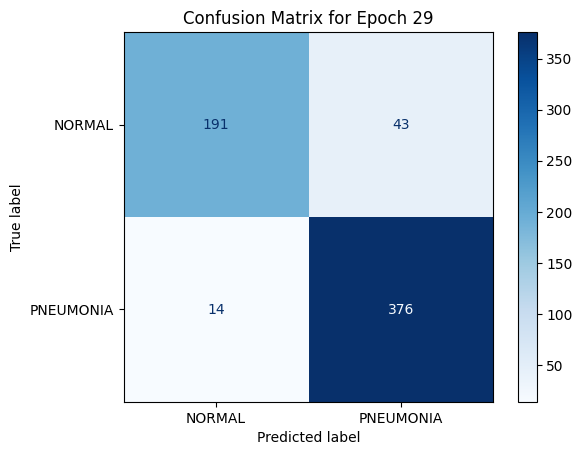

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.93      0.82      0.87       234
   PNEUMONIA       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624


Evaluating Model for Epoch 30:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


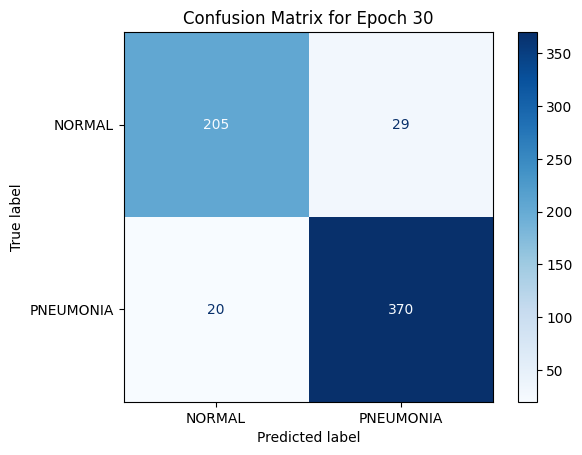

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.88      0.89       234
   PNEUMONIA       0.93      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 31:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step


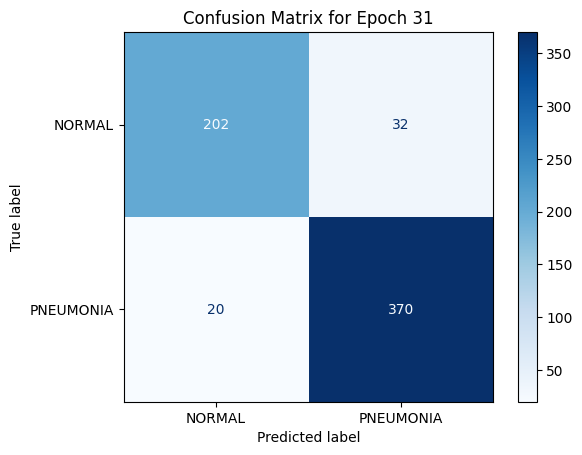

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.86      0.89       234
   PNEUMONIA       0.92      0.95      0.93       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 32:
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step


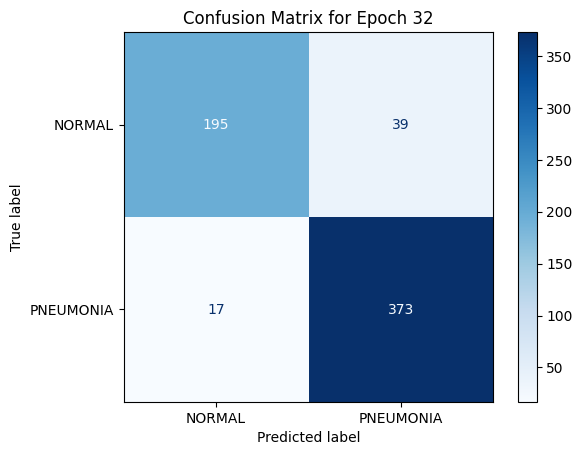

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.92      0.83      0.87       234
   PNEUMONIA       0.91      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624


Evaluating Model for Epoch 33:
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step


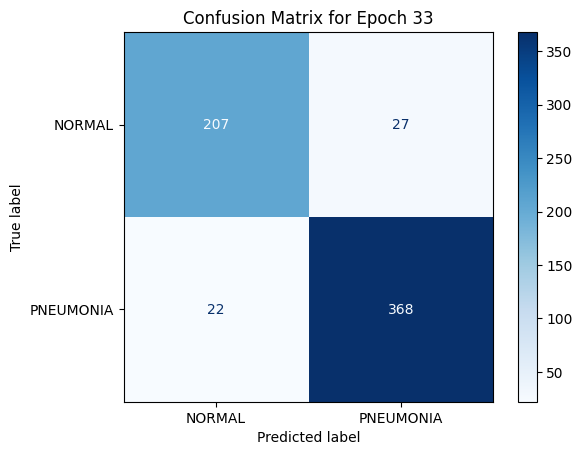

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.90      0.88      0.89       234
   PNEUMONIA       0.93      0.94      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 34:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


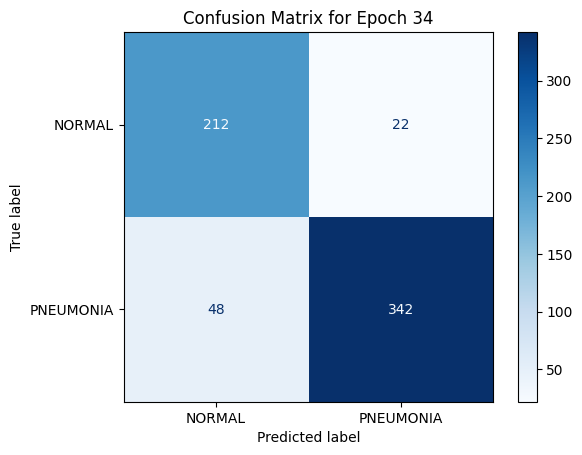

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.82      0.91      0.86       234
   PNEUMONIA       0.94      0.88      0.91       390

    accuracy                           0.89       624
   macro avg       0.88      0.89      0.88       624
weighted avg       0.89      0.89      0.89       624


Evaluating Model for Epoch 35:
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step


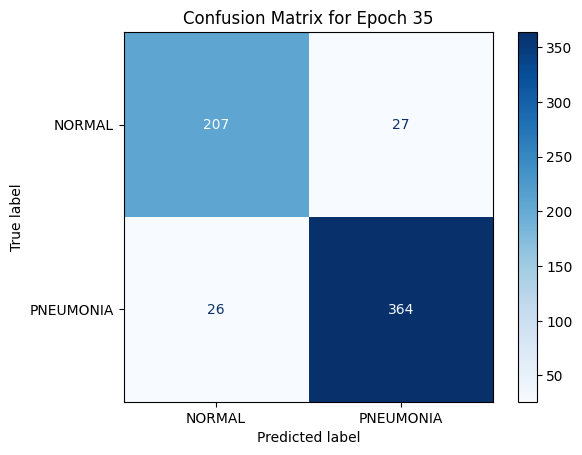

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.89      0.88      0.89       234
   PNEUMONIA       0.93      0.93      0.93       390

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.91      0.92      0.92       624


Evaluating Model for Epoch 36:
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step


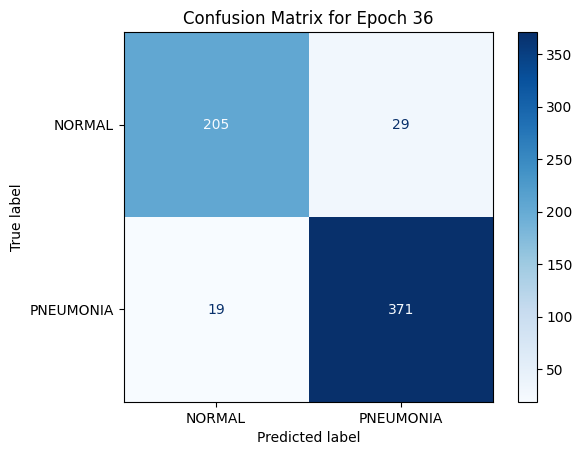

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.92      0.88      0.90       234
   PNEUMONIA       0.93      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 37:
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step


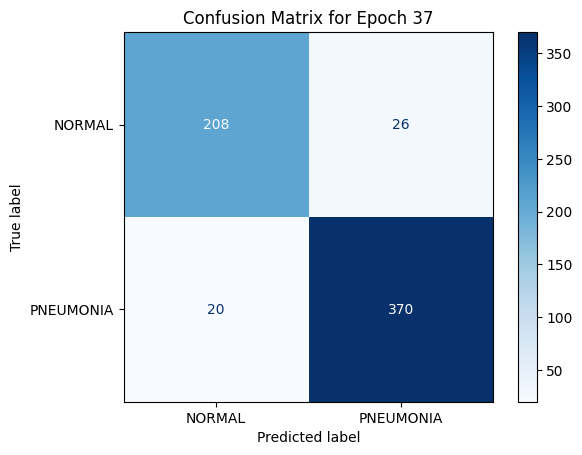

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.89      0.90       234
   PNEUMONIA       0.93      0.95      0.94       390

    accuracy                           0.93       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.93      0.93      0.93       624


Evaluating Model for Epoch 38:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step


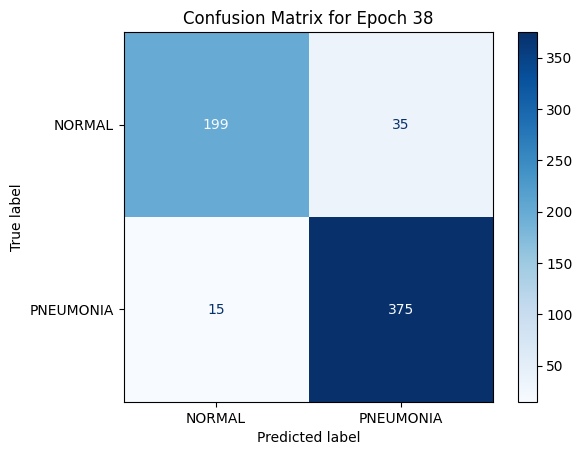

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.93      0.85      0.89       234
   PNEUMONIA       0.91      0.96      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 39:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


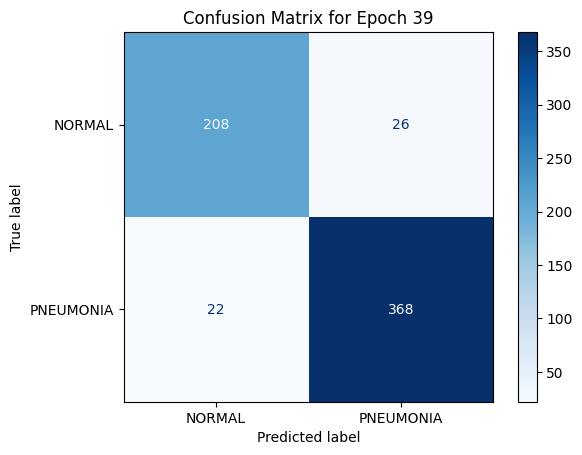

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.90      0.89      0.90       234
   PNEUMONIA       0.93      0.94      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 40:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


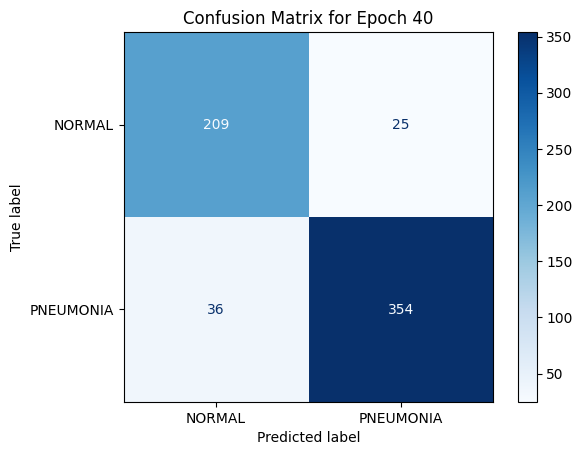

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.85      0.89      0.87       234
   PNEUMONIA       0.93      0.91      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624



In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Loop through models from epoch 1 to 40
for epoch in range(1, 41):
    weights_file = f"weights_epoch_{epoch:02d}.weights.h5"
    print(f"\nEvaluating Model for Epoch {epoch}:")
    
    try:
        # Load weights for the current epoch
        model.load_weights(weights_file)
        
        # Get true labels and predicted labels for the test set
        test_generator.reset()  # Reset the generator to iterate through the data
        y_true = test_generator.classes  # True labels
        y_pred_probs = model.predict(test_generator)  # Predicted probabilities
        y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

        # Compute the confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Display the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_generator.class_indices.keys())
        disp.plot(cmap='Blues')
        plt.title(f"Confusion Matrix for Epoch {epoch}")
        plt.show()

        # Print the classification report
        print("Classification Report:")
        print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
    
    except FileNotFoundError:
        print(f"Warning: Weights file for epoch {epoch} not found.")
        continue



Evaluating Model for Epoch 41:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


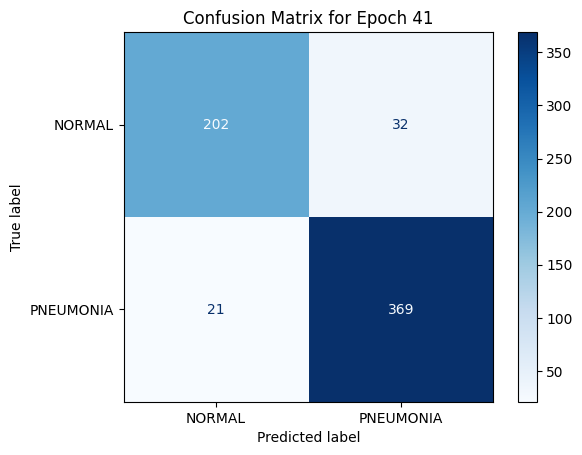

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.86      0.88       234
   PNEUMONIA       0.92      0.95      0.93       390

    accuracy                           0.92       624
   macro avg       0.91      0.90      0.91       624
weighted avg       0.91      0.92      0.91       624


Evaluating Model for Epoch 42:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


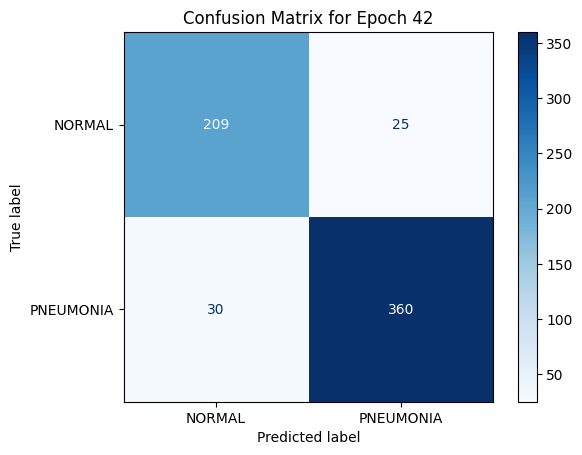

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.87      0.89      0.88       234
   PNEUMONIA       0.94      0.92      0.93       390

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624


Evaluating Model for Epoch 43:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step


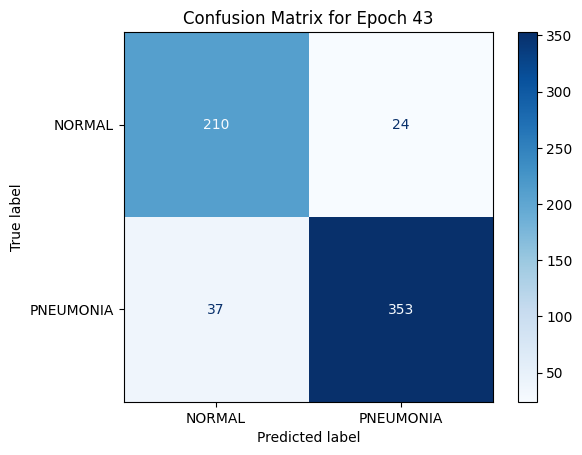

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.85      0.90      0.87       234
   PNEUMONIA       0.94      0.91      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624


Evaluating Model for Epoch 44:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


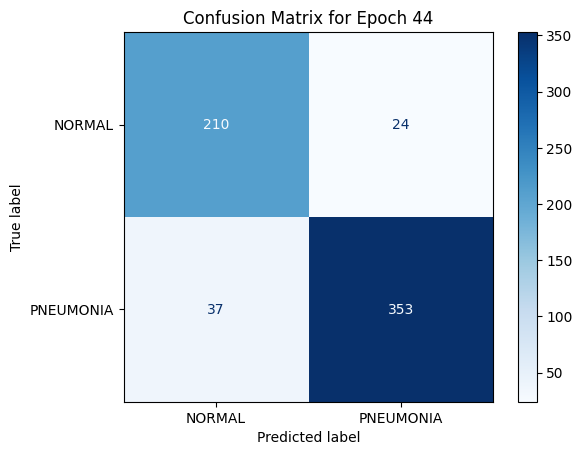

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.85      0.90      0.87       234
   PNEUMONIA       0.94      0.91      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624


Evaluating Model for Epoch 45:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


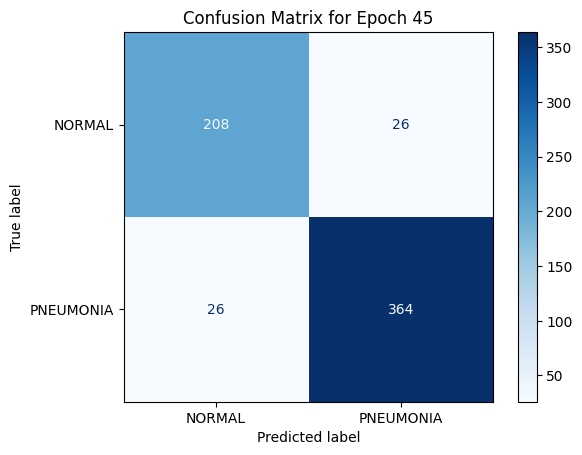

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.89      0.89      0.89       234
   PNEUMONIA       0.93      0.93      0.93       390

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 46:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step


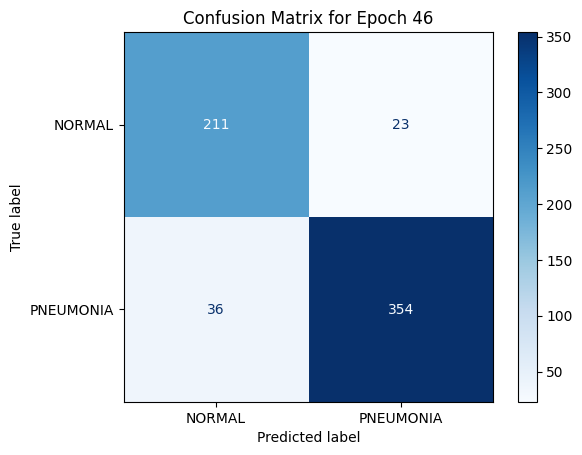

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.85      0.90      0.88       234
   PNEUMONIA       0.94      0.91      0.92       390

    accuracy                           0.91       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624


Evaluating Model for Epoch 47:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step


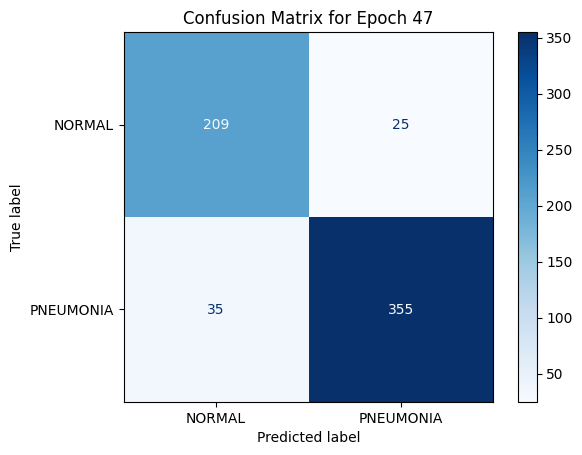

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.86      0.89      0.87       234
   PNEUMONIA       0.93      0.91      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.90      0.90       624


Evaluating Model for Epoch 48:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step


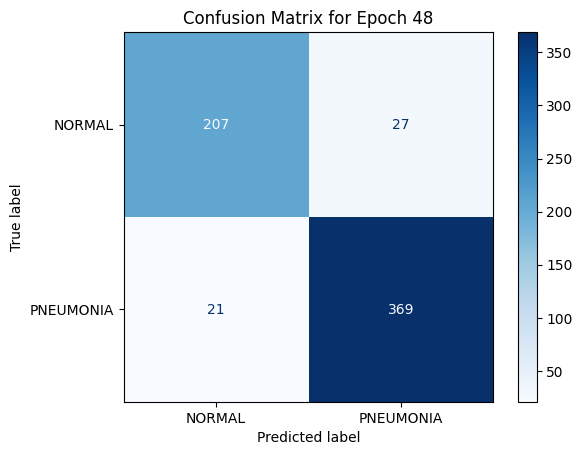

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.88      0.90       234
   PNEUMONIA       0.93      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624


Evaluating Model for Epoch 49:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step


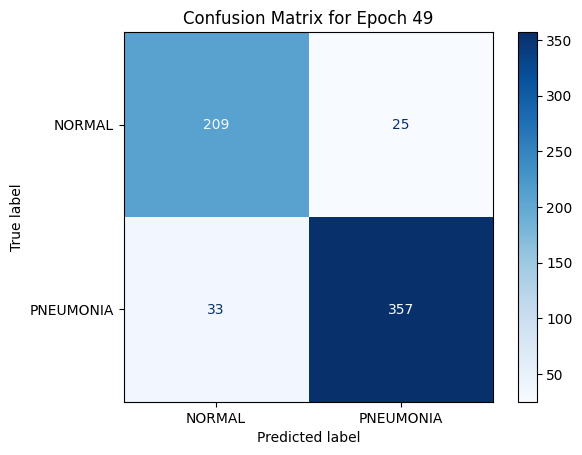

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.86      0.89      0.88       234
   PNEUMONIA       0.93      0.92      0.92       390

    accuracy                           0.91       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624


Evaluating Model for Epoch 50:
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step


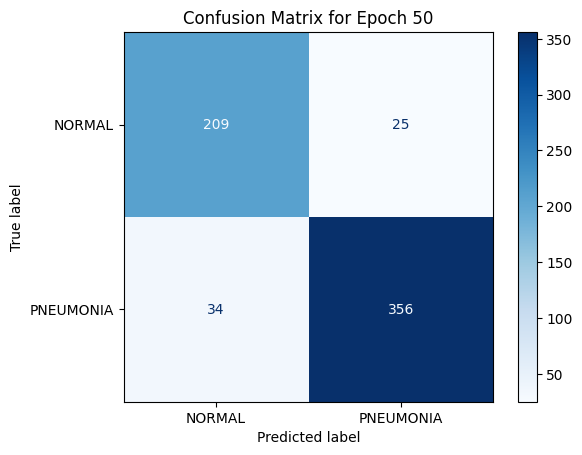

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.86      0.89      0.88       234
   PNEUMONIA       0.93      0.91      0.92       390

    accuracy                           0.91       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624



In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Loop through models from epoch 1 to 40
for epoch in range(41, 51):
    weights_file = f"weights_epoch_{epoch:02d}.weights.h5"
    print(f"\nEvaluating Model for Epoch {epoch}:")
    
    try:
        # Load weights for the current epoch
        model.load_weights(weights_file)
        
        # Get true labels and predicted labels for the test set
        test_generator.reset()  # Reset the generator to iterate through the data
        y_true = test_generator.classes  # True labels
        y_pred_probs = model.predict(test_generator)  # Predicted probabilities
        y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

        # Compute the confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Display the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_generator.class_indices.keys())
        disp.plot(cmap='Blues')
        plt.title(f"Confusion Matrix for Epoch {epoch}")
        plt.show()

        # Print the classification report
        print("Classification Report:")
        print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
    
    except FileNotFoundError:
        print(f"Warning: Weights file for epoch {epoch} not found.")
        continue


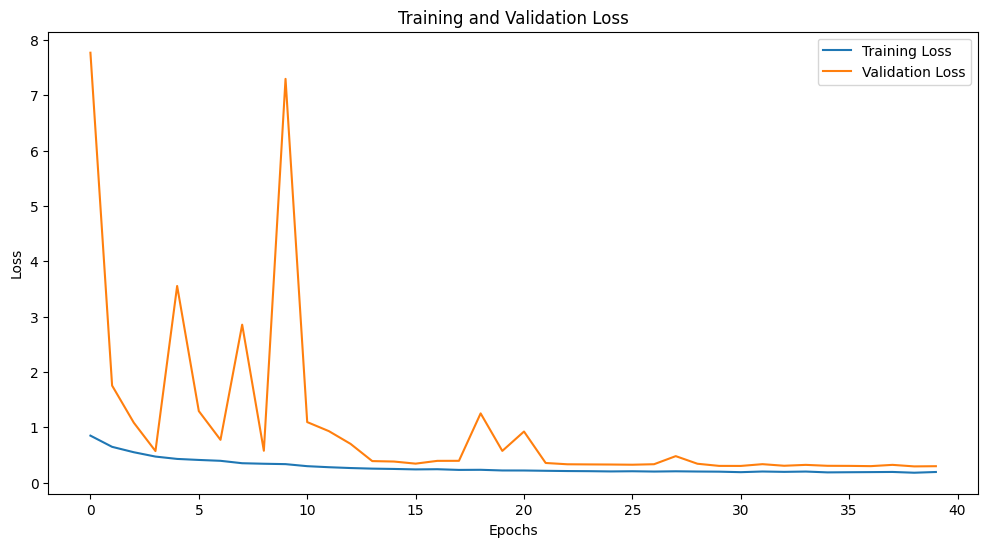

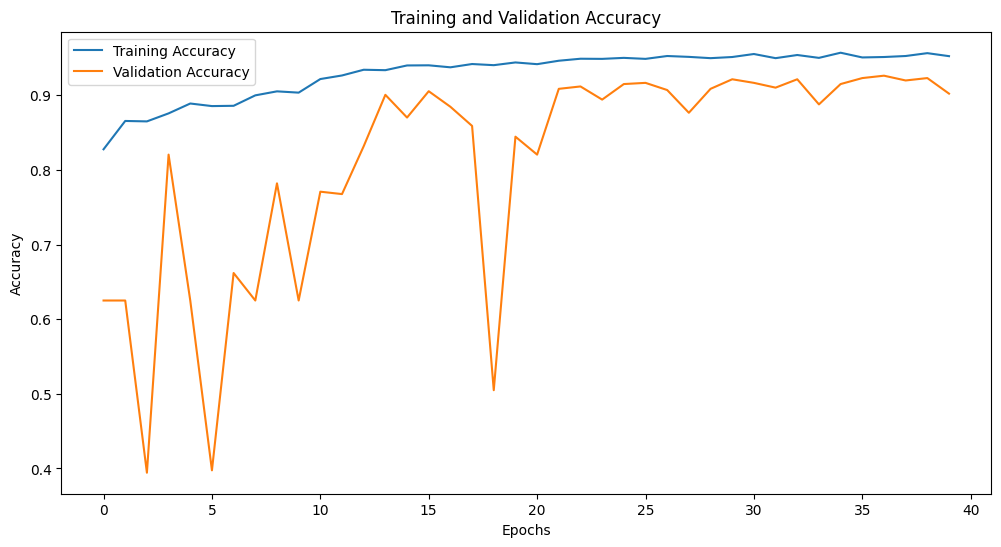

In [9]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()
def plot_training_curves(history):
    # Loss plot
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Accuracy plot
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

plot_training_curves(history)


In [10]:
model.save('Version6.keras')